In [3]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [5]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [7]:
len(df.CarName.unique())

147

In [8]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [9]:
features = df.drop(['price','CarName', 'car_ID', 'boreratio', "compressionratio", 'horsepower', 'enginelocation','drivewheel'], axis=1)
target = df.price

features.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'stroke',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [10]:
features1 = pd.get_dummies(features)
features1.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'stroke', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

# Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
features2 = mms.fit_transform(features1)

In [12]:
target.dtype

dtype('float64')

# Split the Feature and target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, target,test_size=0.25, random_state=4)
print("X_train, X_test, y_train, y_test", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, X_test, y_train, y_test (153, 44) (52, 44) (153,) (52,)


# Model building

In [15]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
clf = RandomForestRegressor(n_estimators=150)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13052.30666667 13671.12        6455.68666667 15236.03111333
 36255.40333333  8244.96       17093.58001333 14811.43556
 13637.39444667 16898.86666667 13425.96666667 16600.41333333
  8911.47333333  6235.44666667  6283.64       29994.27333333
  9188.58        9485.41666667 16500.53556    14470.06
 19592.39333333  6446.74        7226.40666667  9295.38
 15728.99333333  5783.46666667  7550.90666667  9092.44
  7807.9         7601.40666667  7154.22       16730.18666667
 20466.17444667  7419.63       15982.82666667 37070.02666667
 14840.15333333 20242.02111333 16257.40666667 12355.5
  7364.23333333  7842.98333333  6892.85        6601.44
  7819.04        6145.33333333 12474.93889111 37070.02666667
 10044.8         6358.49333333 17550.42        7860.27333333]
mean squeared error:  4256753.695442017


<Axes: xlabel='price', ylabel='Count'>

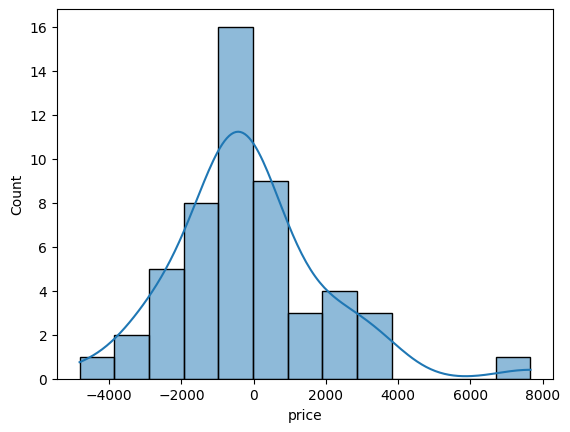

In [17]:

import seaborn as sns

sns.histplot(y_test - pred, kde=True)

In [18]:

import matplotlib.pyplot as plt

<BarContainer object of 44 artists>

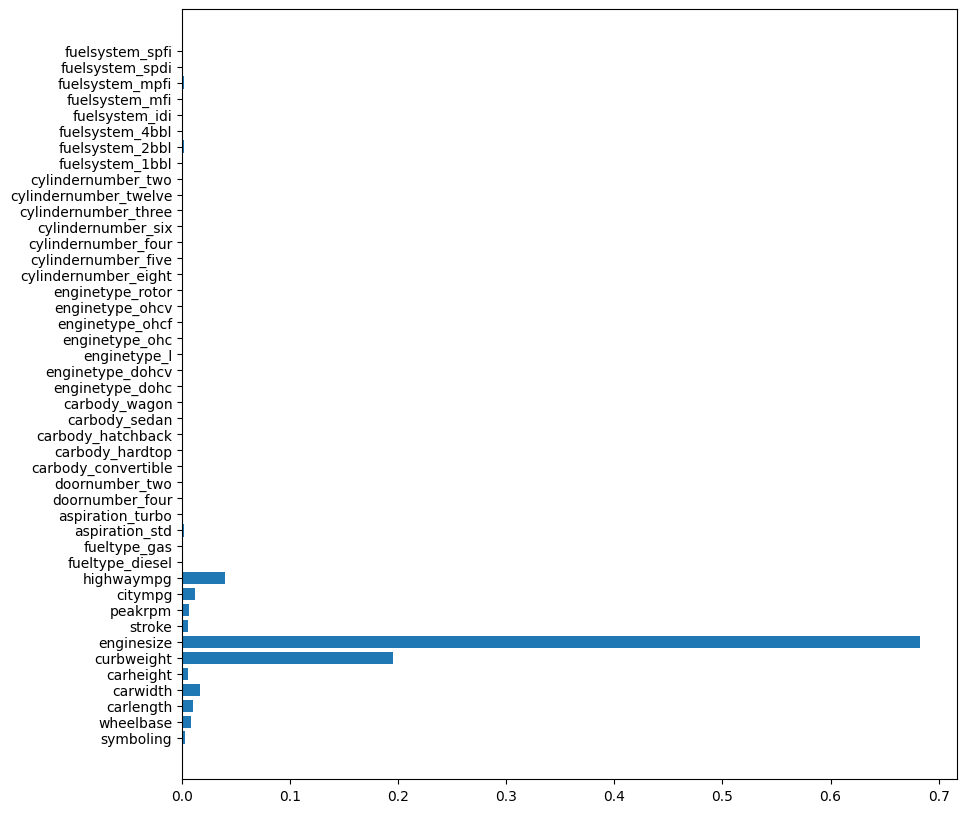

In [19]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf.feature_importances_)

In [20]:
clf2 = SVR(C=45)
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [10315.13625846 10122.5574721   9386.2110613  10628.82542715
 10693.69507055 10128.59938188 10608.75262227 10485.11250711
 10093.93145149 10578.30260865 10177.67327623 10218.7720848
 10277.54104177  9680.16382654  9680.56984302 10476.9001731
  9471.51798983 10354.539284   10565.61081801 10125.95775463
 10305.45913557  9375.26692706  9460.10049283  9476.82161398
 10482.84286874  9940.85022034  9499.7534913  10118.52523741
  9503.46602686 10023.18919206  9484.04820012 10537.15174373
 10544.36062807  9500.44952003 10567.3588261  10726.37518564
 10234.81810307 10529.18322528 10282.36401676 10130.3664736
  9482.8468721   9736.06669446  9475.62142513  9396.1796537
 10106.7173958   9373.28523994 10143.0701908  10726.37518564
 10124.23267263  9405.85713106 10477.28008237 10011.73146983]
mean squeared error:  59500481.07559096


In [21]:
clf3 = DecisionTreeRegressor()
clf3.fit(X_train, y_train)

pred = clf3.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13495.  14489.   6669.  13499.  25552.   7975.  17199.  15250.  12170.
 18280.  16430.  16515.   8558.   6855.   6855.  37028.   9549.   9995.
 16558.  14489.  19045.   6488.   6575.   8845.  16630.   5399.   8916.5
  9980.   7999.   7738.   7395.  17075.  18920.   7299.  16900.  36880.
 12170.  19045.  15985.  11549.   7499.   7775.   6692.   6669.   7775.
  5572.  13950.  36880.   9639.   6229.  21105.   7957. ]
mean squeared error:  6631348.701923077


<BarContainer object of 44 artists>

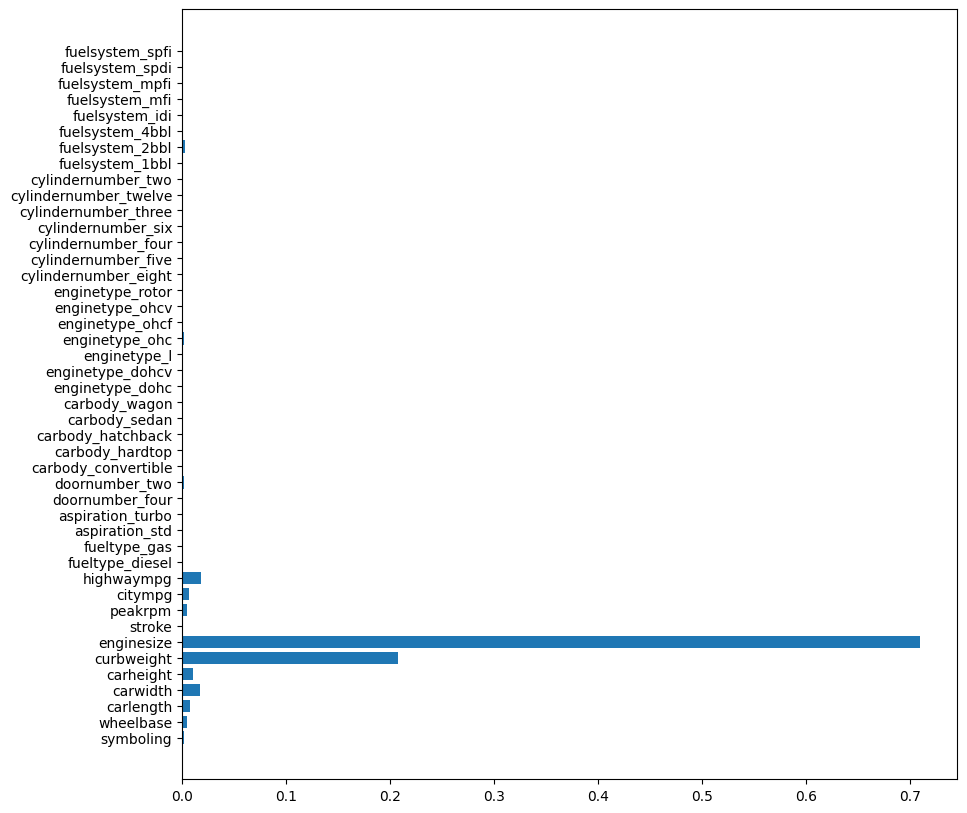

In [22]:

plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf3.feature_importances_)

# By considering above model and tuning the parameters, Random forest Regressor works best on it

In [23]:
# randomized search CV

# no. of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]

# no. of features to consider at every split
max_feature = ['auto','sqrt']

#maximum no. of levelsin tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum no. of sample required to split a node
min_samples_split = [2,5,10,15,100]

#min. no. samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
rf_random = RandomizedSearchCV(estimator= clf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, random_state=42, n_jobs= 1)


In [26]:
rf_random.fit(X_train,y_train)

pred = rf_random.predict(X_test)

mean_squared_error(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

3758646.5458459193